In [1]:
# !export GOOGLE_APPLICATION_CREDENTIALS="../../Google_cloud_key/Astrobiology Team 2-ae6e32a890f2.json"

In [2]:
import os
import numpy as np
import torch
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="../../Google_cloud_key/Astrobiology Team 2-ae6e32a890f2.json"

In [3]:
from google.cloud import storage

In [4]:
bucket_name = 'inara-debug-4'
gcs_storage_client = storage.Client()
print('Current buckets in the account:')
# List all the available buckets
for bucket in list(gcs_storage_client.list_buckets()):
    print(' ' + bucket.name)
print('Setting root bucket: {} ...'.format(bucket_name))
gcs_bucket = gcs_storage_client.get_bucket(bucket_name)

Current buckets in the account:
 artifacts.astrobiology-team-2.appspot.com
 astrobiology-2-data
 astrobiology-papers
 inara
 inara-debug-1
 inara-debug-2
 inara-debug-3
 inara-debug-4
Setting root bucket: inara-debug-4 ...


In [5]:
dir = 'train'
file_list = list(gcs_bucket.list_blobs(prefix=dir))
print(file_list[1])

<Blob: inara-debug-4, train/fdl_009a284c-968f-4774-a23e-c82def0fb937.csv>


In [6]:
print(file_list)

[<Blob: inara-debug-4, train/fdl_000ef991-ec67-48ec-aa3b-d44885242ed9.csv>, <Blob: inara-debug-4, train/fdl_009a284c-968f-4774-a23e-c82def0fb937.csv>, <Blob: inara-debug-4, train/fdl_00bcdadb-b561-4cde-a8f6-1a5678ee0e69.csv>, <Blob: inara-debug-4, train/fdl_01246bc5-7bae-4133-8eff-69b7c3f561bf.csv>, <Blob: inara-debug-4, train/fdl_013625e4-6a70-49de-b419-c9fccd9d6ebd.csv>, <Blob: inara-debug-4, train/fdl_01e98509-d473-49fb-9318-eb55be9b7bf9.csv>, <Blob: inara-debug-4, train/fdl_01f5ff19-d313-4101-85c2-b85a1a11a6bf.csv>, <Blob: inara-debug-4, train/fdl_022eae1e-3696-44b7-a3e4-ff614186a53a.csv>, <Blob: inara-debug-4, train/fdl_027e8225-48b6-423c-b9fc-e2cf2182f47d.csv>, <Blob: inara-debug-4, train/fdl_02d2a839-2bf6-468b-af54-b824a541f228.csv>, <Blob: inara-debug-4, train/fdl_02ec0b1e-eac5-47b6-a020-1bac19040885.csv>, <Blob: inara-debug-4, train/fdl_0358c423-7709-4ee9-94be-ba3caee737b9.csv>, <Blob: inara-debug-4, train/fdl_039e12b8-89c3-439e-89de-cebcc18b66e0.csv>, <Blob: inara-debug-4, tr

In [7]:
def read_data_from_blob(blob):
        data_string = blob.download_as_string().decode('utf-8')
        # Creating a torch tensor here from a single blob (csv format)
        return pd.read_csv(StringIO(data_string), delimiter='\t', header=None)

In [8]:
data = read_data_from_blob(file_list[1])

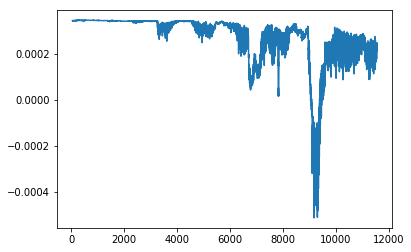

In [9]:
plt.plot(data.iloc[0,39:])
plt.show()

In [10]:
np.array(data).shape

(10, 11554)

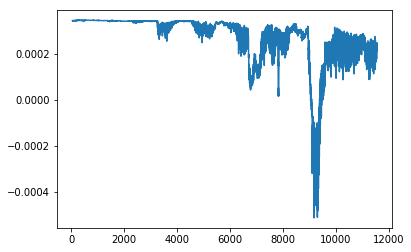

Surface Temperature:  228.91157512235176


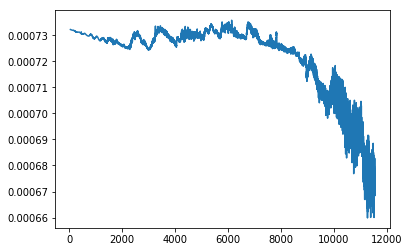

Surface Temperature:  206.12420567124406


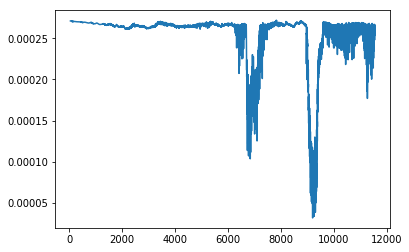

Surface Temperature:  227.55177233674232


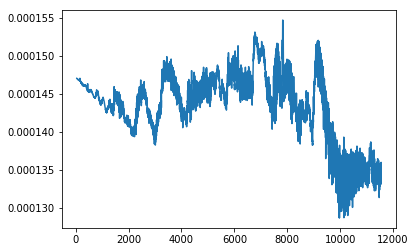

Surface Temperature:  1114.7535868502741


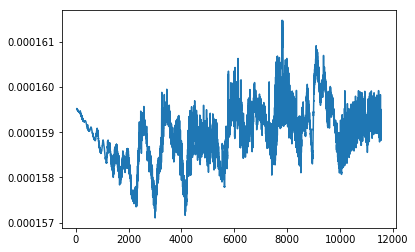

Surface Temperature:  326.98218580185886


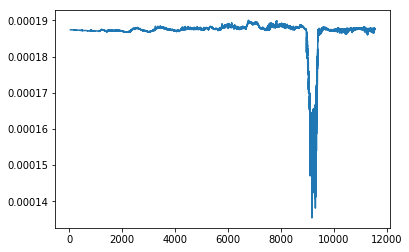

Surface Temperature:  222.38899487898144


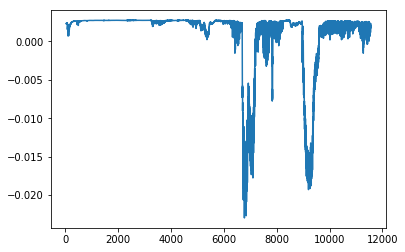

Surface Temperature:  436.1967959936653


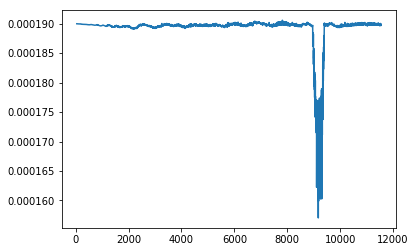

Surface Temperature:  268.7967263365407


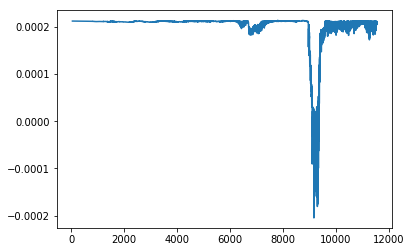

Surface Temperature:  235.8713611107693


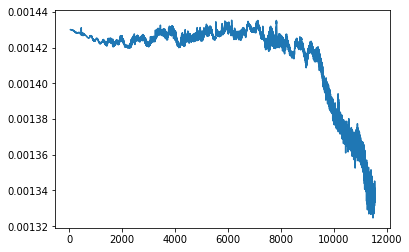

Surface Temperature:  670.6413328310673


In [11]:
for n in range(10):
    plt.plot(data.iloc[n,39:])
    plt.show()
    print('Surface Temperature: ', data.iloc[n,12])

In [12]:
data.iloc[1,:39]

0     6.000000e+00
1     3.328214e+03
2     5.117310e-01
3     2.250681e-01
4     9.576943e+03
5     7.159230e+00
6     6.608614e-01
7    -4.245092e+00
8     2.477273e+00
9    -2.510761e+00
10    1.677857e-01
11    9.893456e-01
12    2.061242e+02
13    1.000000e+00
14    2.000000e+00
15    7.000000e+00
16    2.200000e+01
17    6.000000e+00
18    4.000000e+00
19    5.000000e+00
20    3.000000e+00
21    9.000000e+00
22    1.100000e+01
23    2.700000e+01
24    1.000000e+01
25    1.805083e-02
26    4.700986e-01
27    3.676669e-01
28    6.170127e-02
29    5.345700e-02
30    3.938900e-03
31    9.817976e-03
32    3.456670e-03
33    1.077676e-02
34    7.623249e-04
35    2.724569e-04
36    2.693250e-07
37    3.669057e+01
38    5.266070e-01
Name: 1, dtype: float64

In [13]:
dir = 'train/psg_config'
file_list = list(gcs_bucket.list_blobs(prefix=dir))
print(file_list[1])

<Blob: inara-debug-4, train/psg_config/fdl_000ef991-ec67-48ec-aa3b-d44885242ed9_10.config>


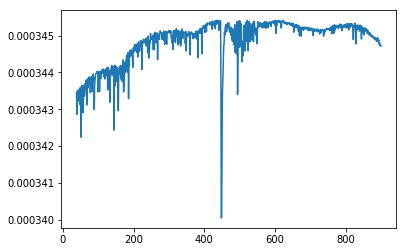

In [14]:
plt.plot(data.iloc[0,39:900])
plt.show()